# Final Project Submission

Please fill out:
* Student name: Alejandro Harrison 
* Student pace: Self Paced
* Scheduled project review date/time: June 28, 10am
* Instructor name: Claude Fried
* Blog post URL: https://dev.to/crazyjandro/data-science-and-depression-10pf


## Introduction

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office, and must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. 

While combing through movie datasets from Box Office Mojo, IMDB, and The Numbers, three factors were focused on that help determine a movie's success in the box office:

* Genre of movie
* Production budget of film
* Partnering up with another movie studio

## 1. Genre

Let's start off by looking at the IMDB database, which contains over 69,000 movies along with their ratings, number of people who voted on the rating, movie director, etc. 


In [1]:
import pandas as pd
import sqlite3

#Open up a connection to the database
conn = sqlite3.connect("im.db")

In [2]:
#We really only want to focus on genre, rating, and number of votes but we'll also include things like movie title, director 
#and start year.

#Let's join together some of the databases to turn all of our data into one readable table, as well as convert to a DF 
#to make it more easy to manipulate.

movies_df = pd.read_sql("""
        SELECT primary_title, original_title, start_year, genres, averagerating, numvotes,primary_name 
        FROM movie_basics
        JOIN movie_ratings
        USING(movie_id)
        JOIN directors
        USING(movie_id)
        JOIN persons
        USING(person_id);
        """,conn
)


In [3]:
#Let's take a look at our DF
movies_df.info()
movies_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   primary_title   181387 non-null  object 
 1   original_title  181387 non-null  object 
 2   start_year      181387 non-null  int64  
 3   genres          180047 non-null  object 
 4   averagerating   181387 non-null  float64
 5   numvotes        181387 non-null  int64  
 6   primary_name    181387 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 9.7+ MB


,primary_title,original_title,start_year,genres,averagerating,numvotes,primary_name
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43,Mani Kaul
...,...,...,...,...,...,...,...
181382,Albatross,Albatross,2017,Documentary,8.5,8,Chris Jordan
181383,Albatross,Albatross,2017,Documentary,8.5,8,Chris Jordan
181384,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,Laura Jou
181385,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,Laura Jou


In [4]:
#It looks like there are duplicate entries, so let's get rid of them and take another look at our DF
movies_df = movies_df.drop_duplicates(subset = ['primary_title']).reset_index(drop = True)

movies_df.info()
movies_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69285 entries, 0 to 69284
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   69285 non-null  object 
 1   original_title  69285 non-null  object 
 2   start_year      69285 non-null  int64  
 3   genres          68647 non-null  object 
 4   averagerating   69285 non-null  float64
 5   numvotes        69285 non-null  int64  
 6   primary_name    69285 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.7+ MB


,primary_title,original_title,start_year,genres,averagerating,numvotes,primary_name
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43,Mani Kaul
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,Orson Welles
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119,Raoul Ruiz
...,...,...,...,...,...,...,...
69280,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,Drama,8.4,365,Vineesh Aaradya
69281,Swarm Season,Swarm Season,2019,Documentary,6.2,5,Sarah Christman
69282,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6,Giancarlo Soldi
69283,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136,Ahmet Faik Akinci


In [5]:
#It also looks like there are some null values in the 'genres' column, so let's get rid of the null values.
movies_df.dropna(subset = ['genres'], inplace = True)
movies_df.info()
movies_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68647 entries, 0 to 69283
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   68647 non-null  object 
 1   original_title  68647 non-null  object 
 2   start_year      68647 non-null  int64  
 3   genres          68647 non-null  object 
 4   averagerating   68647 non-null  float64
 5   numvotes        68647 non-null  int64  
 6   primary_name    68647 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.2+ MB


,primary_title,original_title,start_year,genres,averagerating,numvotes,primary_name
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43,Mani Kaul
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,Orson Welles
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119,Raoul Ruiz
...,...,...,...,...,...,...,...
69279,Jeg ser deg,Jeg ser deg,2019,"Crime,Documentary",6.1,7,Maria Salazar
69280,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,Drama,8.4,365,Vineesh Aaradya
69281,Swarm Season,Swarm Season,2019,Documentary,6.2,5,Sarah Christman
69282,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6,Giancarlo Soldi


In [6]:
#Let's also rename our columns to make them more presentable
movies_df.rename(columns = {"primary_title" : "Primary Title"}, inplace = True)
movies_df.rename(columns = {"original_title" : "Original Title"}, inplace = True)
movies_df.rename(columns = {"start_year" : "Release Year"}, inplace = True)
movies_df.rename(columns = {"genres" : "Genre"}, inplace = True)
movies_df.rename(columns = {"averagerating" : "Average Rating"}, inplace = True)
movies_df.rename(columns = {"numvotes" : "Number of Votes"}, inplace = True)
movies_df.rename(columns = {"primary_name" : "Director"}, inplace = True)
movies_df

,Primary Title,Original Title,Release Year,Genre,Average Rating,Number of Votes,Director
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43,Mani Kaul
2,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517,Orson Welles
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee
4,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119,Raoul Ruiz
...,...,...,...,...,...,...,...
69279,Jeg ser deg,Jeg ser deg,2019,"Crime,Documentary",6.1,7,Maria Salazar
69280,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,Drama,8.4,365,Vineesh Aaradya
69281,Swarm Season,Swarm Season,2019,Documentary,6.2,5,Sarah Christman
69282,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6,Giancarlo Soldi


In [7]:
#We want to see the frequency of each type of genre, but many of the values contain multiple genres.
#Let's split up our values

#First we'll split up the string of genres for each movie into a list of genres.
movies_df['Genre'] = movies_df['Genre'].str.split(',')
movies_df

,Primary Title,Original Title,Release Year,Genre,Average Rating,Number of Votes,Director
0,Sunghursh,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"[Biography, Drama]",7.2,43,Mani Kaul
2,The Other Side of the Wind,The Other Side of the Wind,2018,[Drama],6.9,4517,Orson Welles
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13,Hrishikesh Mukherjee
4,The Wandering Soap Opera,La Telenovela Errante,2017,"[Comedy, Drama, Fantasy]",6.5,119,Raoul Ruiz
...,...,...,...,...,...,...,...
69279,Jeg ser deg,Jeg ser deg,2019,"[Crime, Documentary]",6.1,7,Maria Salazar
69280,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,[Drama],8.4,365,Vineesh Aaradya
69281,Swarm Season,Swarm Season,2019,[Documentary],6.2,5,Sarah Christman
69282,Diabolik sono io,Diabolik sono io,2019,[Documentary],6.2,6,Giancarlo Soldi


In [8]:
#Then we'll turn each individual genre into its own entry
exploded_movies_df = movies_df.explode('Genre')
exploded_movies_df

,Primary Title,Original Title,Release Year,Genre,Average Rating,Number of Votes,Director
0,Sunghursh,Sunghursh,2013,Action,7.0,77,Harnam Singh Rawail
0,Sunghursh,Sunghursh,2013,Crime,7.0,77,Harnam Singh Rawail
0,Sunghursh,Sunghursh,2013,Drama,7.0,77,Harnam Singh Rawail
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,Biography,7.2,43,Mani Kaul
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,Drama,7.2,43,Mani Kaul
...,...,...,...,...,...,...,...
69280,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,Drama,8.4,365,Vineesh Aaradya
69281,Swarm Season,Swarm Season,2019,Documentary,6.2,5,Sarah Christman
69282,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6,Giancarlo Soldi
69283,Sokagin Çocuklari,Sokagin Çocuklari,2019,Drama,8.7,136,Ahmet Faik Akinci


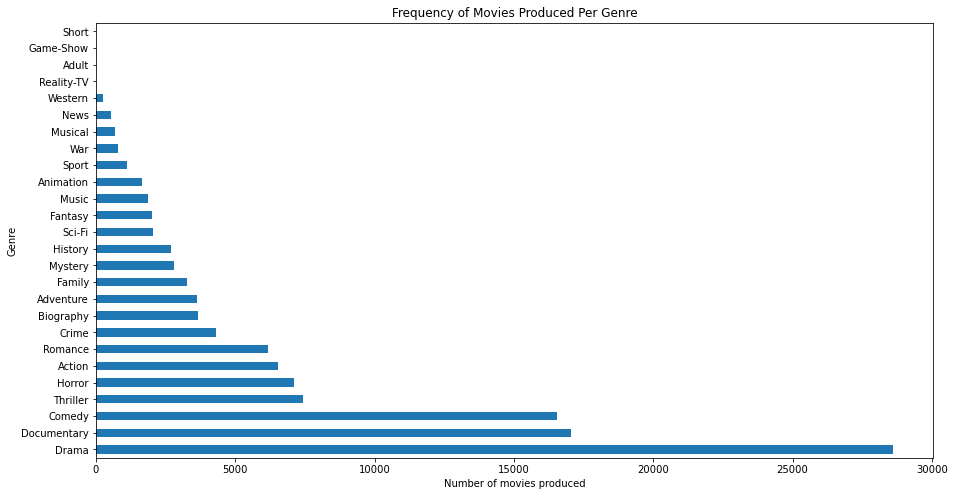

In [9]:
#We can then graph the frequency of each genre in our dataset
ax = exploded_movies_df.value_counts('Genre').plot.barh(figsize = (15,8), title = "Frequency of Movies Produced Per Genre");
ax.set_xlabel("Number of movies produced");

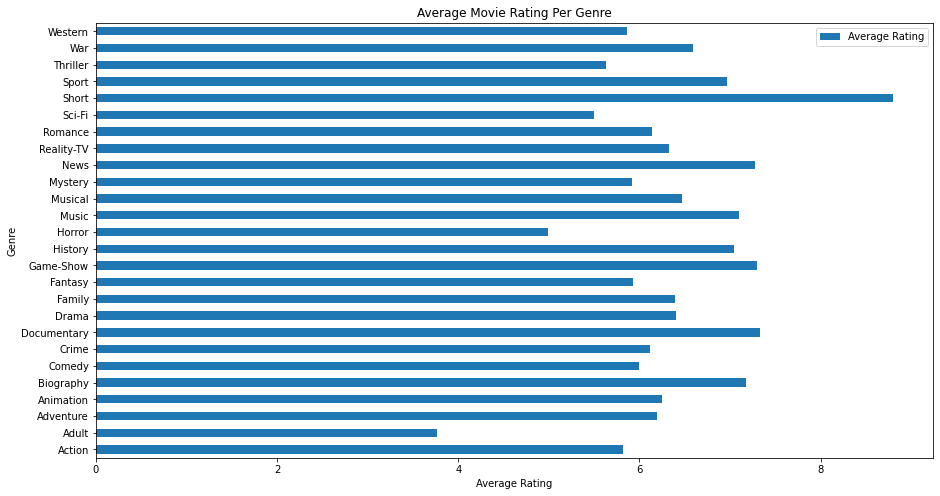

In [10]:
#Now let's graph the average rating for each genre
ax2 = exploded_movies_df.groupby('Genre').mean().plot.barh(y = 'Average Rating', title = "Average Movie Rating Per Genre", figsize = (15,8))
ax2.set_xlabel("Average Rating");

**But wait, why does the genre "short" have the highest average rating, when its frequency is so low? Same goes for "Reality-Tv" and "Game-Show"**

**Let's limit what kind of genres we include to make the data more accurate**

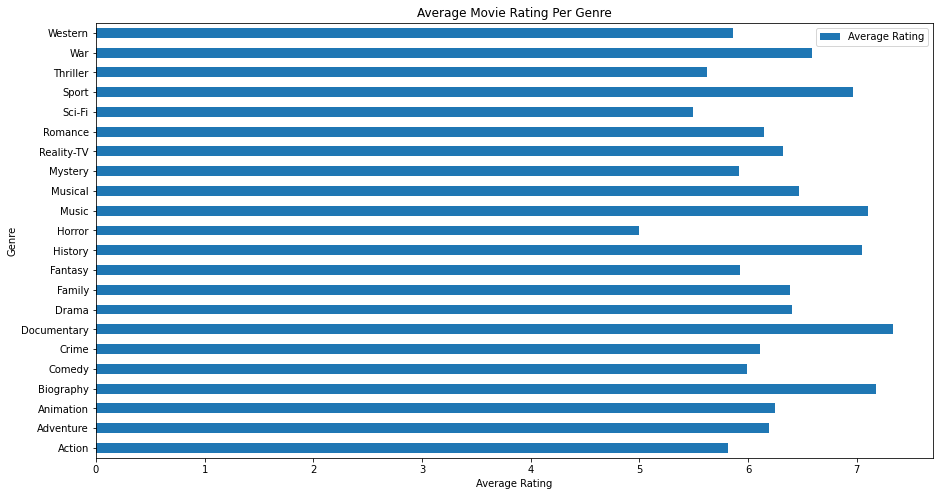

In [11]:
#Making the graph again, but only including those with frequencies able to be seen on the graph
ax3 = exploded_movies_df[(exploded_movies_df.Genre != 'Short') & (exploded_movies_df.Genre != 'News') & (exploded_movies_df.Genre != 'Game-Show') & (exploded_movies_df.Genre != 'Adult')].groupby('Genre').mean().plot.barh(y = "Average Rating",title = "Average Movie Rating Per Genre", figsize = (15,8));
ax3.set_xlabel("Average Rating");

From this IMDB data set we can see two things. The first is that worldwide, the highest number of produced movies belongs to the drama genre. The second is that the highest average movie ratings for a genre belong to the documentary genre, but is closely followed by the sport, musical, history and biography genres.

Next, let's look at how production budget is related to gross box office.

## 2. Production Budget

Production cost can include things like paying crew and cast, post production editing ,filming and equipment costs, marketing for the movie, etc. I wanted to see if there was any relationship between production budget and box office earnings. Luckily I had just the dataset (from The Numbers) to answer that question. The dataset was full of various movies and also contained their production budget as well as domestic and global box office earnings for each respesctive movie. I then was able to run a Pearson's correlation between production budget and gross box office earnings (both domestic and foreign). Let's look at the results below.

In [12]:
#Let's open the dataset
df_budget = pd.read_csv('tn.movie_budgets.csv')

#Let's check out our data
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
#There are no null values, but let's check for duplicates.
df_budget.drop_duplicates()
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
#First let's do some cleanup
#There are no null values or duplicates, but we need to do some conversions

#Let's get rid of the dollar signs and commas in the column values
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',','')


#Now let's convert the strings to ints
df_budget['production_budget'] = df_budget['production_budget'].astype(str).astype('int')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype(str).astype('int')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(str).astype('int64')


#Let's clean up the column names
df_budget.rename(columns = {'id' : 'ID'}, inplace = True)
df_budget.rename(columns = {'release_date' : 'Release Date'}, inplace = True)
df_budget.rename(columns = {'movie' : 'Movie'}, inplace = True)
df_budget.rename(columns = {'production_budget' : 'Production Budget'}, inplace = True)
df_budget.rename(columns = {'domestic_gross' : 'Domestic Gross'}, inplace = True)
df_budget.rename(columns = {'worldwide_gross' : 'Worldwide Gross'}, inplace = True)

#Looking at our cleaned up DF
df_budget

,ID,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


The correlation coefficient between Production budget and worldwide box office is: 0.7483059765694753
The correlation coefficient between Production budget and domestic box office is: 0.6856818396752733


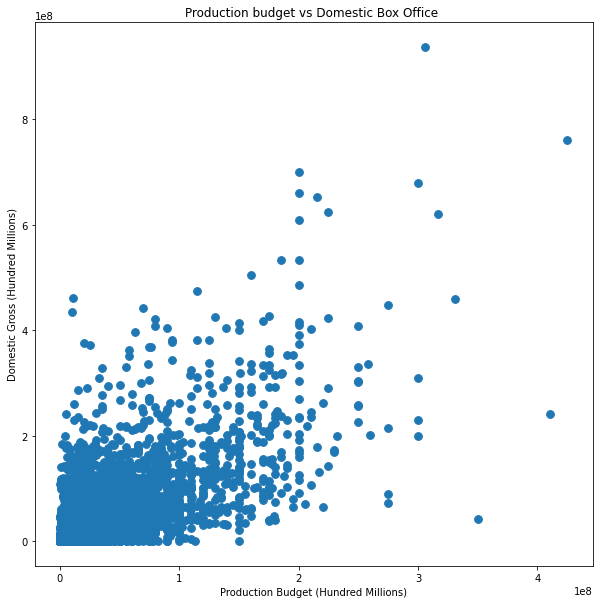

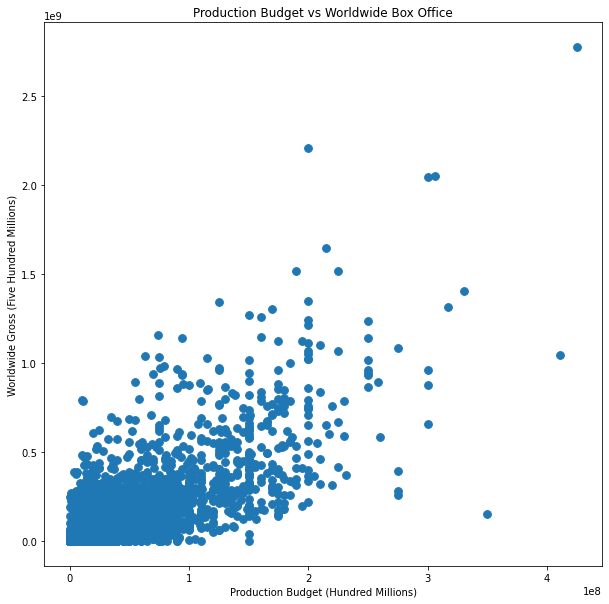

In [15]:
# Let's create a scatterplot and find the correlation coeffient

#Graphing scatterplot for production budget and domestic gross
ax1 = df_budget.plot('Production Budget', 'Domestic Gross', s = 60,  kind = 'scatter', figsize = (10,10));
ax1.set_title('Production budget vs Domestic Box Office ')
ax1.set_xlabel('Production Budget (Hundred Millions)')
ax1.set_ylabel('Domestic Gross (Hundred Millions)')
#Finding correlation coefficent
dom_corr = df_budget['Production Budget'].corr(df_budget['Domestic Gross'])


#Graphing scatterplot for production budget and worldwide gross
ax2 = df_budget.plot('Production Budget', 'Worldwide Gross', s = 60, kind = 'scatter', figsize = (10,10))
ax2.set_title("Production Budget vs Worldwide Box Office")
ax2.set_xlabel('Production Budget (Hundred Millions)')
ax2.set_ylabel('Worldwide Gross (Five Hundred Millions)')
#Finding correlation coefficent
world_corr = df_budget['Production Budget'].corr(df_budget['Worldwide Gross'])

print("The correlation coefficient between Production budget and worldwide box office is:", world_corr)
print("The correlation coefficient between Production budget and domestic box office is:", dom_corr)

In [16]:
#We can also look at things like the average production budget
print('The average production budget is: $'+ str(int(df_budget['Production Budget'].mean())) + ' and the standard deviation is: $' + str(int(df_budget['Production Budget'].std())))


The average production budget is: $31587757 and the standard deviation is: $41812076


These findings suggest that a higher production cost is correlated with higher box office earnings.  Further reasoning is discussed in the powerpoint. We also found that the average production budget was 31,587,757 with a standard deviation of 41,812,076. Looking at our data, a good production budget range would be about 2 standard deviations above the average, between 100 million and 200 million. Lastly we'll look at other movie studio's data so that we can determine who we'd like to team up with on producing a movie.

## 3. Partnering Up With Another Movie Studio
Let's identify some of the studios that not only produce the most movies, but also produce on average the top worldwide grossing movies. Once we identify studios in both categories, we can narrow it down to one studio that should be worked with to produce a movie.

Let's open up the data file from Box Office Mojo, and start taking a look at some numbers.

In [17]:
#Opening up file
df = pd.read_csv("bom.movie_gross.csv")

In [18]:
#Let's check the DF
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
#Looks like there null values in 3 columns, so let's fix that
df.dropna(subset = ['studio','domestic_gross','foreign_gross'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [20]:
#Let's also check for duplicates 
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [21]:
#There's no duplicates, so let's order the DF by highest foreign_gross and highest domestic gross
df = df.sort_values(by = ['domestic_gross', 'foreign_gross'], ascending = False)
df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
292,Perrier's Bounty,IFC,800.0,167000,2010
1738,Jackpot,DR,800.0,1100000,2014
2920,Amityville: The Awakening,W/Dim.,700.0,7700000,2017
642,Illegal (2011),FM,700.0,289000,2011


In [22]:
#Looks like some of the highest grossing movies need their foreign grossing values fixed
df.loc[1872, 'foreign_gross'] = 1131561399
df.loc[1873, 'foreign_gross'] = 1018130012
df.loc[3079, 'foreign_gross'] = 1369544272
df.loc[1874, 'foreign_gross'] = 1162040651
df.loc[2760, 'foreign_gross'] =  1009996733

df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131561399,2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,1369544272,2018
1873,Jurassic World,Uni.,652300000.0,1018130012,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
292,Perrier's Bounty,IFC,800.0,167000,2010
1738,Jackpot,DR,800.0,1100000,2014
2920,Amityville: The Awakening,W/Dim.,700.0,7700000,2017
642,Illegal (2011),FM,700.0,289000,2011


In [23]:
#Let's convert 'domestic_gross' and 'foreign_gross' to ints

df['domestic_gross'] = df['domestic_gross'].astype(float).astype(int)
df['foreign_gross'] = df['foreign_gross'].astype(str).astype(int)

In [24]:
#Let's also combine domestic and foreign gross so that we can get worldwide gross

df['Worldwide Gross'] = df['domestic_gross'] + df['foreign_gross']
df

,title,studio,domestic_gross,foreign_gross,year,Worldwide Gross
1872,Star Wars: The Force Awakens,BV,936700000,1131561399,2015,2068261399
3080,Black Panther,BV,700100000,646900000,2018,1347000000
3079,Avengers: Infinity War,BV,678800000,1369544272,2018,2048344272
1873,Jurassic World,Uni.,652300000,1018130012,2015,1670430012
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
...,...,...,...,...,...,...
292,Perrier's Bounty,IFC,800,167000,2010,167800
1738,Jackpot,DR,800,1100000,2014,1100800
2920,Amityville: The Awakening,W/Dim.,700,7700000,2017,7700700
642,Illegal (2011),FM,700,289000,2011,289700


In [25]:
#Let's also rename the columns to make the table look nicer

df.rename(columns = {'domestic_gross' : 'Domestic Gross'}, inplace = True)
df.rename(columns = {'foreign_gross' : 'Foreign Gross'}, inplace = True)
df.rename(columns = {'title' : 'Title'}, inplace = True)
df.rename(columns = {'studio' : 'Studio'}, inplace = True)
df.rename(columns = {'year' : 'Year'}, inplace = True)
df

,Title,Studio,Domestic Gross,Foreign Gross,Year,Worldwide Gross
1872,Star Wars: The Force Awakens,BV,936700000,1131561399,2015,2068261399
3080,Black Panther,BV,700100000,646900000,2018,1347000000
3079,Avengers: Infinity War,BV,678800000,1369544272,2018,2048344272
1873,Jurassic World,Uni.,652300000,1018130012,2015,1670430012
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
...,...,...,...,...,...,...
292,Perrier's Bounty,IFC,800,167000,2010,167800
1738,Jackpot,DR,800,1100000,2014,1100800
2920,Amityville: The Awakening,W/Dim.,700,7700000,2017,7700700
642,Illegal (2011),FM,700,289000,2011,289700


    Studio  Title  Domestic Gross  Foreign Gross  Year  Worldwide Gross
0       3D      1               1              1     1                1
1      A24     19              19             19    19               19
2       AF      2               2              2     2                2
3      AGF      1               1              1     1                1
4       AR      1               1              1     1                1
..     ...    ...             ...            ...   ...              ...
167    WOW      1               1              1     1                1
168  Wein.     69              69             69    69               69
169   Yash      6               6              6     6                6
170    Zee      1               1              1     1                1
171  Zeit.      5               5              5     5                5

[172 rows x 6 columns]
       Studio  Title
155      Uni.    144
57        Fox    134
163        WB    130
142      Sony    105
22     

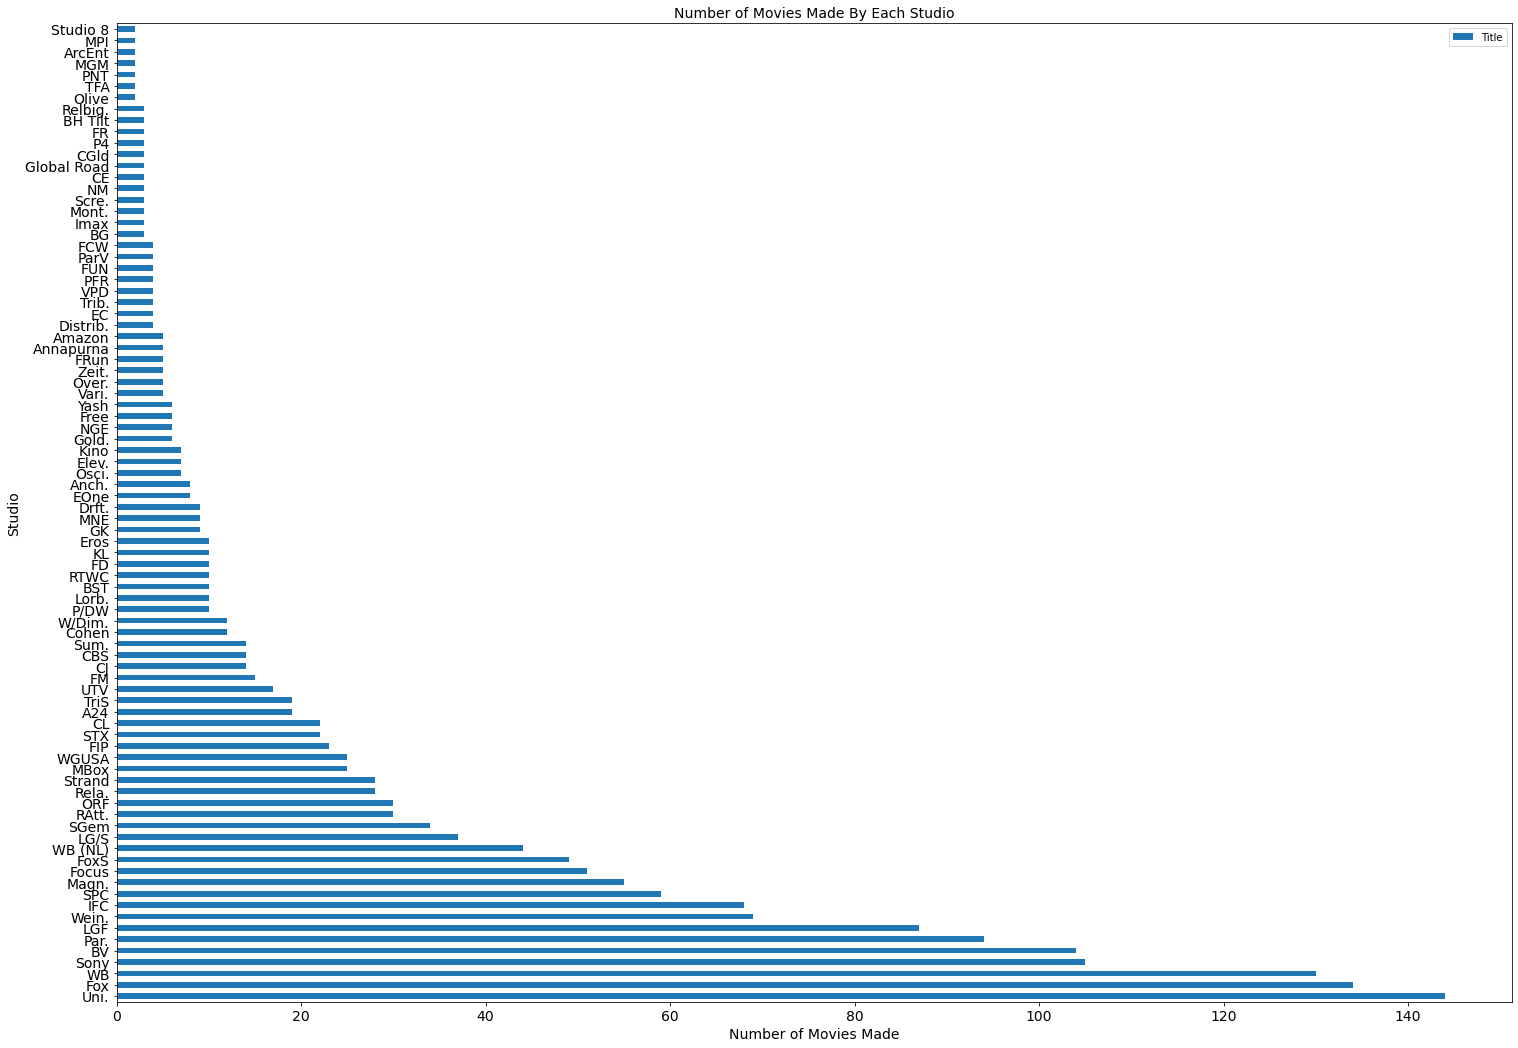

In [26]:
#Let's count the frequencies of movies made by each studio
all_starz = df.groupby('Studio', as_index = False).count()
print(all_starz)

#There are 172 studios, let's look at half of the top producing studios
all_starz = all_starz.sort_values('Title', ascending = False)[:86]

#Let's filter our data and only look at studio, and how many titles were produced
all_starz = all_starz[['Studio', 'Title']].copy()
print(all_starz)

#Let's graph the frequencies
all_starz_ax = all_starz.plot.barh(x = 'Studio', y = 'Title',figsize = (25,18), fontsize = 14)
all_starz_ax.set_xlabel('Number of Movies Made', fontsize = 14);
all_starz_ax.set_ylabel('Studio', fontsize = 14);
all_starz_ax.set_title('Number of Movies Made By Each Studio', fontsize = 14);

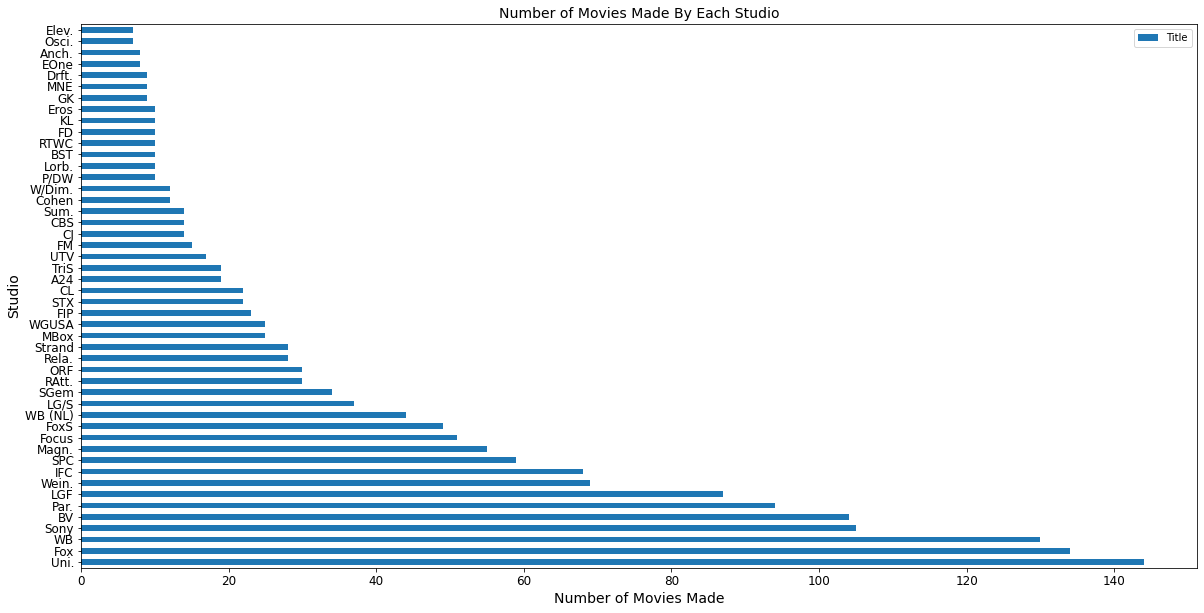

In [27]:
#It looks like there's a stark difference between many of the studios and the number of movies they produce,
#so let's half the data again so we can get a better picture of the top producers

all_starz_ax = all_starz.loc[:43].plot.barh(x = 'Studio', figsize = (20,10),fontsize = 12);
all_starz_ax.set_xlabel('Number of Movies Made', fontsize = 14);
all_starz_ax.set_ylabel('Studio', fontsize = 14);
all_starz_ax.set_title('Number of Movies Made By Each Studio', fontsize = 14);

In [28]:
#Now let's look at the studios again to see who produces on average the top worldwide grossing movies
#Again there are 172 studios, so let's look at the top half
studio_world_df = df.groupby('Studio', as_index = False).mean().sort_values(by = 'Worldwide Gross', ascending = False)[:86]
studio_world_df

,Studio,Domestic Gross,Foreign Gross,Year,Worldwide Gross
67,HC,2.700000e+06,8.676000e+08,2017.000000,8.703000e+08
116,P/DW,1.682900e+08,3.393600e+08,2010.900000,5.076500e+08
22,BV,1.768897e+08,2.720669e+08,2013.730769,4.489566e+08
66,GrtIndia,2.020000e+07,2.340000e+08,2017.000000,2.542000e+08
163,WB,9.325846e+07,1.435993e+08,2013.853846,2.368577e+08
...,...,...,...,...,...
64,Greenwich,1.600000e+06,9.900000e+06,2018.000000,1.150000e+07
128,ParV,6.850000e+06,3.848325e+06,2010.750000,1.069832e+07
8,Amazon,3.400000e+06,6.960000e+06,2017.800000,1.036000e+07
99,Magn.,4.474236e+05,9.184158e+06,2011.963636,9.631582e+06


In [29]:
#Let's convert the columns to int type
studio_world_df['Domestic Gross'] = studio_world_df['Domestic Gross'].astype(float).astype(int)
studio_world_df['Foreign Gross'] = studio_world_df['Foreign Gross'].astype(float).astype(int)
studio_world_df['Year'] = studio_world_df['Year'].astype(float).astype(int)
studio_world_df['Worldwide Gross'] = studio_world_df['Worldwide Gross'].astype(float).astype(int)
studio_world_df

,Studio,Domestic Gross,Foreign Gross,Year,Worldwide Gross
67,HC,2700000,867600000,2017,870300000
116,P/DW,168290000,339360000,2010,507650000
22,BV,176889703,272066902,2013,448956606
66,GrtIndia,20200000,234000000,2017,254200000
163,WB,93258461,143599253,2013,236857715
...,...,...,...,...,...
64,Greenwich,1600000,9900000,2018,11500000
128,ParV,6850000,3848325,2010,10698325
8,Amazon,3399999,6960000,2017,10359999
99,Magn.,447423,9184158,2011,9631581


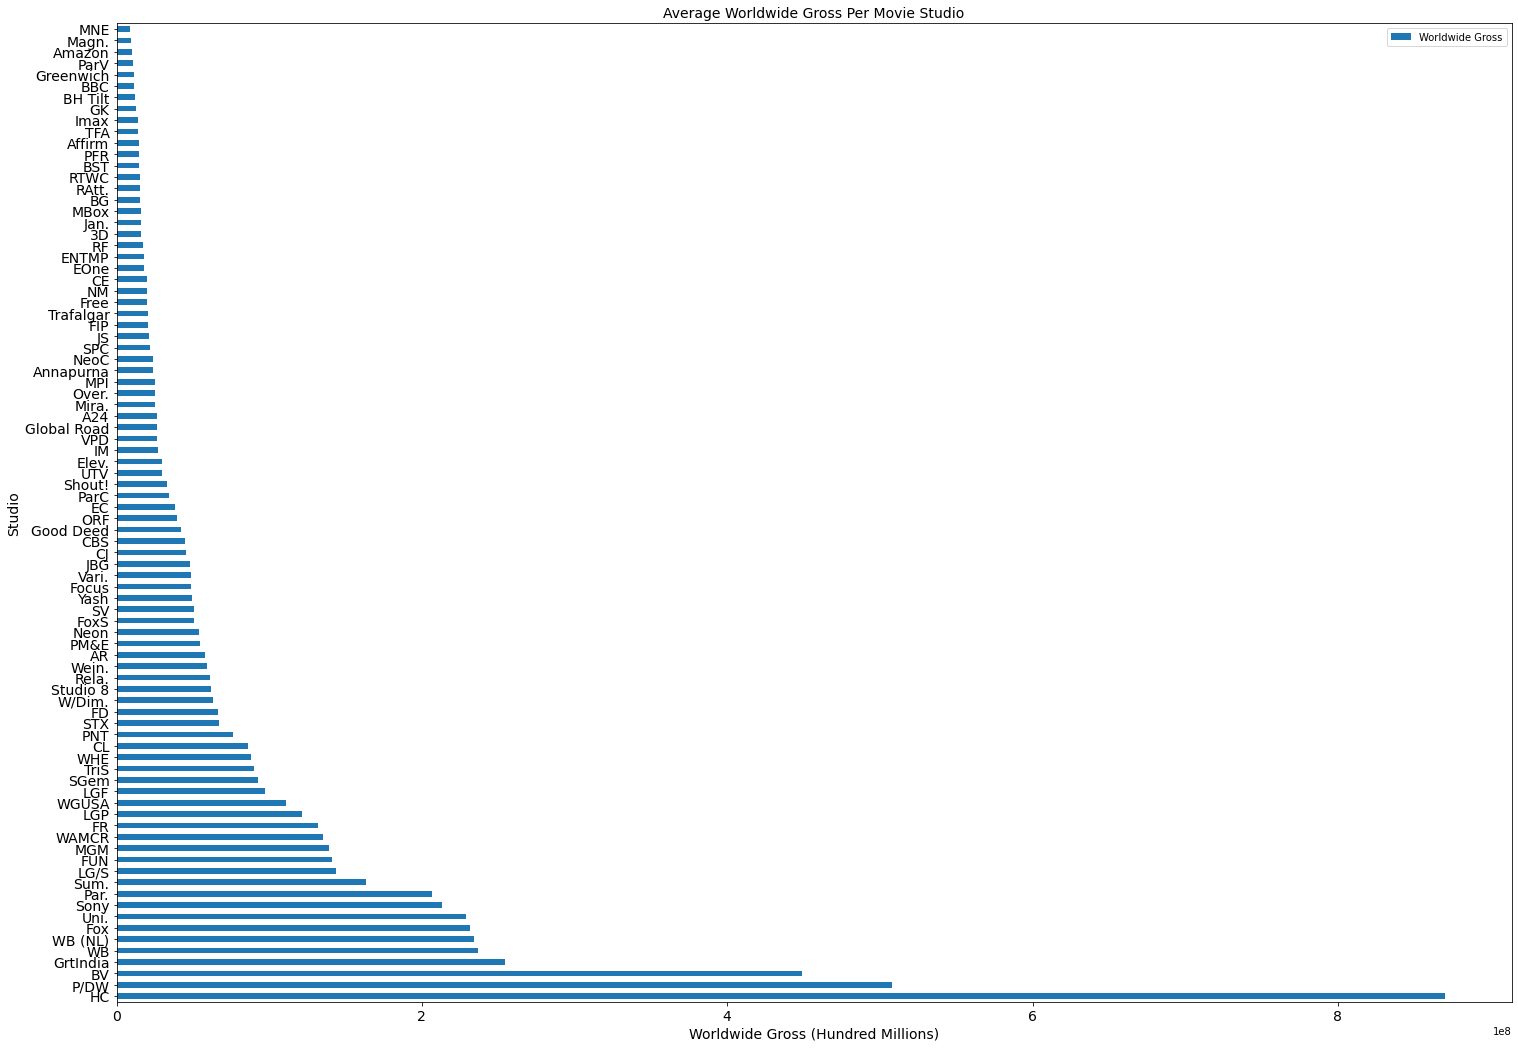

In [30]:
#Now let's plot the data
studio_world_ax = studio_world_df.plot.barh(x = 'Studio',y = 'Worldwide Gross', figsize = (25,18), fontsize = 14);
studio_world_ax.set_xlabel('Worldwide Gross (Hundred Millions)', fontsize = 14);
studio_world_ax.set_ylabel('Studio', fontsize = 14);
studio_world_ax.set_title('Average Worldwide Gross Per Movie Studio', fontsize = 14);

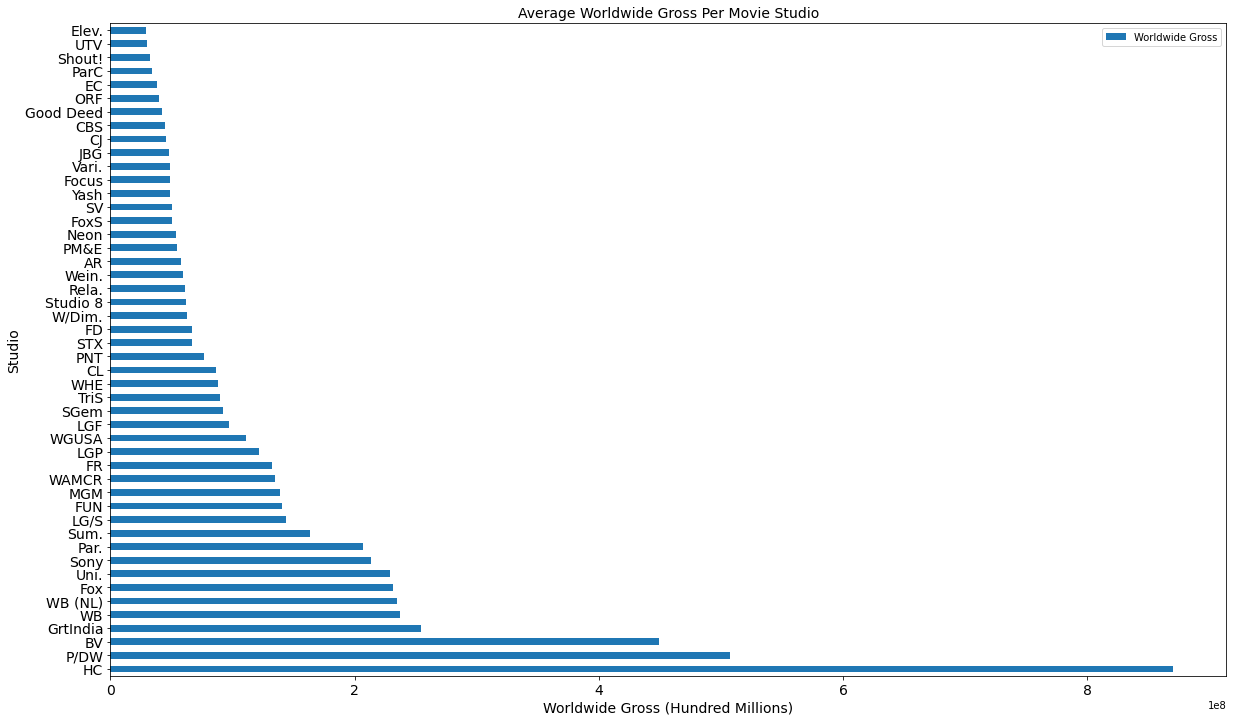

In [31]:
#Again there's a stark difference between studios for top average worldwide grossing , so let's half the graph again.

studio_world_ax = studio_world_df.loc[:43].plot.barh(x = 'Studio',y = 'Worldwide Gross',figsize = (20,12), fontsize = 14);
studio_world_ax.set_xlabel('Worldwide Gross (Hundred Millions)', fontsize = 14);
studio_world_ax.set_ylabel('Studio', fontsize = 14);
studio_world_ax.set_title('Average Worldwide Gross Per Movie Studio', fontsize = 14);

If we look at the data we can see the studious that produced the most movies, and we can also see the studios that produce on average the highest worldwide grossing movies. For most movies produced, the top 3 are Universal Pictures, Fox Studios, and Warner Bros Studios. 

For top average worldwide grossing movies, the top 3 studious are HC, P/DW, and BV (Disney). However when we look at the amount of movies produced by these studios HC isn't even in the top 50%. If we continue to look at high worldwide grossing movie studios we see GrtIndia, and WB. Again Grt India is not in the top 50% for number of movies made, but WB is among the top 3. That leaves our options between P/DW, BV, and WB. It is recommended to go with WB Studios, as they have over 120 movies made, and still come within the top 5 for highest average worldwide gross.

## Conclusion

3 factors to focus on for a successful movie were suggested:
* Genre of movie
* Production budget of film
* Partnering up with another movie studio.

Each of these factors have been examined carefully using data and data analysis procedures from various sources. I saw that worldwide, the highest number of produced movies belongs to the drama genre, but the highest average movie ratings for a genre belong to the documentary genre, closely followed by the sport, musical, history and biography genres. I also saw that there is a positive correlation between production budget and box office earnings, and that the average production budget was $31,587,757. I determined that the best production budget would be between 100 and 200 million dollars. Lastly I looked at various movie studios and the number of movies they produced as well as their average worldwide box office earnings. I then compared the various movie studios in order to see which ones had the most potential as movie partners. The final choice ended up being Warner Brothers Studios. 

## Recommendations

* Best genres to focus on include documentary, sport, history, and musical
* Ideal budget to maximize profits is between 100 and 200 million dollars
    * Movie is successful if gross box office earnings are twice the production budget
* Partner up with Warner Bros
    * They are a highly experienced studio with many high grossing box office hits
